# Day 09. Exercise 02
# Metrics

## 0. Imports

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [150]:
def calc_metrics(models, params):
    all_metrics = {}
    for model_, params_ in zip(models, params):
        clf = model_(random_state=21, **params_).fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)
        all_metrics[type(clf).__name__] = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'roc_auc': roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo')
        }
    return all_metrics

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [151]:
df = pd.read_csv('../data/dayofweek-not-scaled.csv')
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [152]:
X, y = df.drop(columns=['dayofweek']), df.dayofweek

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,
                                                    random_state=21,
                                                    stratify=y)

## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [154]:
# {'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf'}
clf_svc = SVC(kernel='rbf', gamma='auto', class_weight=None, C=10,
              probability=True, random_state=21)
clf_svc.fit(X_train, y_train)

y_pred = clf_svc.predict(X_test)
y_score = clf_svc.predict_proba(X_test)

print(f"accuracy:  {accuracy_score(y_test, y_pred):.5f}")
print(f"precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall:    {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc:   {roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo'):.5f}")

accuracy:  0.88757
precision: 0.89267
recall:    0.88757
roc_auc:   0.97878


In [155]:
calc_metrics([SVC], [{'kernel':'rbf', 'gamma':'auto', 'class_weight':None,
                      'C':10, 'probability':True}])

{'SVC': {'accuracy': 0.8875739644970414,
  'precision': 0.8926729169690374,
  'recall': 0.8875739644970414,
  'roc_auc': 0.9787793228216216}}

## 3. Decision tree

1. The same task for decision tree

In [156]:
# {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 22}
clf_tree = DecisionTreeClassifier(random_state=21, max_depth=22,
                                   class_weight='balanced', criterion='gini')

clf_tree.fit(X_train, y_train)

y_pred = clf_tree.predict(X_test)
y_score = clf_tree.predict_proba(X_test)

print(f"accuracy:  {accuracy_score(y_test, y_pred):.5f}")
print(f"precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall:    {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc:   {roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo'):.5f}")

accuracy:  0.89053
precision: 0.89262
recall:    0.89053
roc_auc:   0.93664


## 4. Random forest

1. The same task for random forest.

In [157]:
# {'class_weight': None, 'criterion': 'gini', 'max_depth': 28, 'n_estimators': 50}
clf_forest = RandomForestClassifier(random_state=21, n_estimators=50, max_depth=28,
                                    criterion='gini', class_weight=None)

clf_forest.fit(X_train, y_train)

y_pred = clf_forest.predict(X_test)
y_score = clf_forest.predict_proba(X_test)

print(f"accuracy:  {accuracy_score(y_test, y_pred):.5f}")
print(f"precision: {precision_score(y_test, y_pred, average='weighted'):.5f}")
print(f"recall:    {recall_score(y_test, y_pred, average='weighted'):.5f}")
print(f"roc_auc:   {roc_auc_score(y_test, y_score, average='weighted', multi_class='ovo'):.5f}")

accuracy:  0.92899
precision: 0.93009
recall:    0.92899
roc_auc:   0.99033


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

> Best model `RandomForestClassifier`

In [158]:
compare = pd.concat([X_test.drop(columns=['numTrials', 'hour']),
                     pd.DataFrame({'y_real': y_test})], axis='columns').reset_index(drop=True)
compare = pd.concat([compare, pd.DataFrame({'y_pred': y_pred})], axis=1)
compare

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,y_real,y_pred
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5,5
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6,6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3
334,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1
335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
336,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1


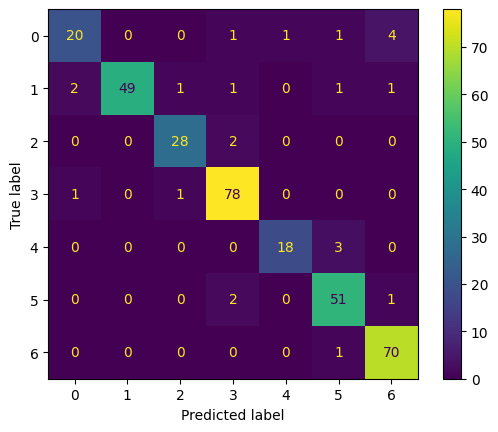

In [159]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred, labels=clf_forest.classes_),
                              display_labels=clf_forest.classes_)
disp.plot()
plt.show()

> Most of all incorrectly predicted is on `Mondays` (`0`) - 7 (25.92%), then `Tuesdays` (`1`) - 6 (10.9%).

In [160]:
tmp = compare[compare.y_real != compare.y_pred].loc[:, compare.columns.str.startswith('uid')].T
tmp.sum(axis=1).loc[(tmp != 0).any(axis=1)]

uid_user_10    1.0
uid_user_14    1.0
uid_user_16    2.0
uid_user_18    1.0
uid_user_19    4.0
uid_user_2     1.0
uid_user_22    1.0
uid_user_24    1.0
uid_user_25    2.0
uid_user_27    1.0
uid_user_29    1.0
uid_user_3     2.0
uid_user_30    1.0
uid_user_31    2.0
uid_user_4     2.0
uid_user_6     1.0
dtype: float64

> For user `uid_user_19` model makes most incorrect predictions

In [161]:
tmp = compare[compare.y_real != compare.y_pred].loc[:, compare.columns.str.startswith('labname')].T
tmp.sum(axis=1).loc[(tmp != 0).any(axis=1)]

labname_code_rvw    1.0
labname_lab03       1.0
labname_lab03s      1.0
labname_lab05s      1.0
labname_laba04      6.0
labname_laba05      1.0
labname_laba06      2.0
labname_laba06s     2.0
labname_project1    9.0
dtype: float64

> For project `labname_project1` model makes most incorrect predictions

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [162]:
models = [SVC, DecisionTreeClassifier, RandomForestClassifier]
params = [
    {'kernel':'rbf', 'gamma':'auto', 'class_weight':None, 'C':10, 'probability':True},
    {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 22},
    {'class_weight': None, 'criterion': 'gini', 'max_depth': 28, 'n_estimators': 50}
]
calc_metrics(models, params)

{'SVC': {'accuracy': 0.8875739644970414,
  'precision': 0.8926729169690374,
  'recall': 0.8875739644970414,
  'roc_auc': 0.9787793228216216},
 'DecisionTreeClassifier': {'accuracy': 0.8905325443786982,
  'precision': 0.8926192681313897,
  'recall': 0.8905325443786982,
  'roc_auc': 0.9366351447213223},
 'RandomForestClassifier': {'accuracy': 0.9289940828402367,
  'precision': 0.9300865038851309,
  'recall': 0.9289940828402367,
  'roc_auc': 0.9903274757720744}}